# Classification of bean types

## Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import joblib

## Loading data:

In [2]:
Dry_Bean_Dataset = pd.read_excel("Data/Dry_Bean_Dataset.xlsx")  
dryBean_df= Dry_Bean_Dataset.copy()
dryBean_df.sample(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
6122   50634    892.392       366.275116       177.026829      2.069037   
11832  31878    667.718       254.704323       159.710474      1.594788   
5556   39158    742.484       281.334145       178.559786      1.575574   
7637   38439    728.262       266.152672       184.630304      1.441544   
94     33062    667.966       222.039144       189.781341      1.169974   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
6122       0.875446       51401     253.907879  0.718896  0.985078   0.798989   
11832      0.778985       32212     201.465457  0.757827  0.989631   0.898493   
5556       0.772767       39590     223.287962  0.694291  0.989088   0.892599   
7637       0.720263       38863     221.228513  0.807881  0.989090   0.910766   
94         0.519089       33439     205.172722  0.778662  0.988726   0.931173   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
6122      0.693216      0.007234      0.001030      0.480549      0.994273   
11832     0.790978      0.007990      0.001929      0.625646      0.997772   
5556      0.793675      0.007185      0.001759      0.629920      0.992486   
7637      0.831209      0.006924      0.002039      0.690909      0.995975   
94        0.924039      0.006716      0.003020      0.853847      0.998979   

          Class  
6122      HOROZ  
11832  DERMASON  
5556      HOROZ  
7637       SIRA  
94        SEKER

In [3]:
dryBean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
dryBean_df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [5]:
dryBean_df= dryBean_df.drop_duplicates()
dryBean_df.duplicated().sum()

0

## Exploratory Data Analysis :

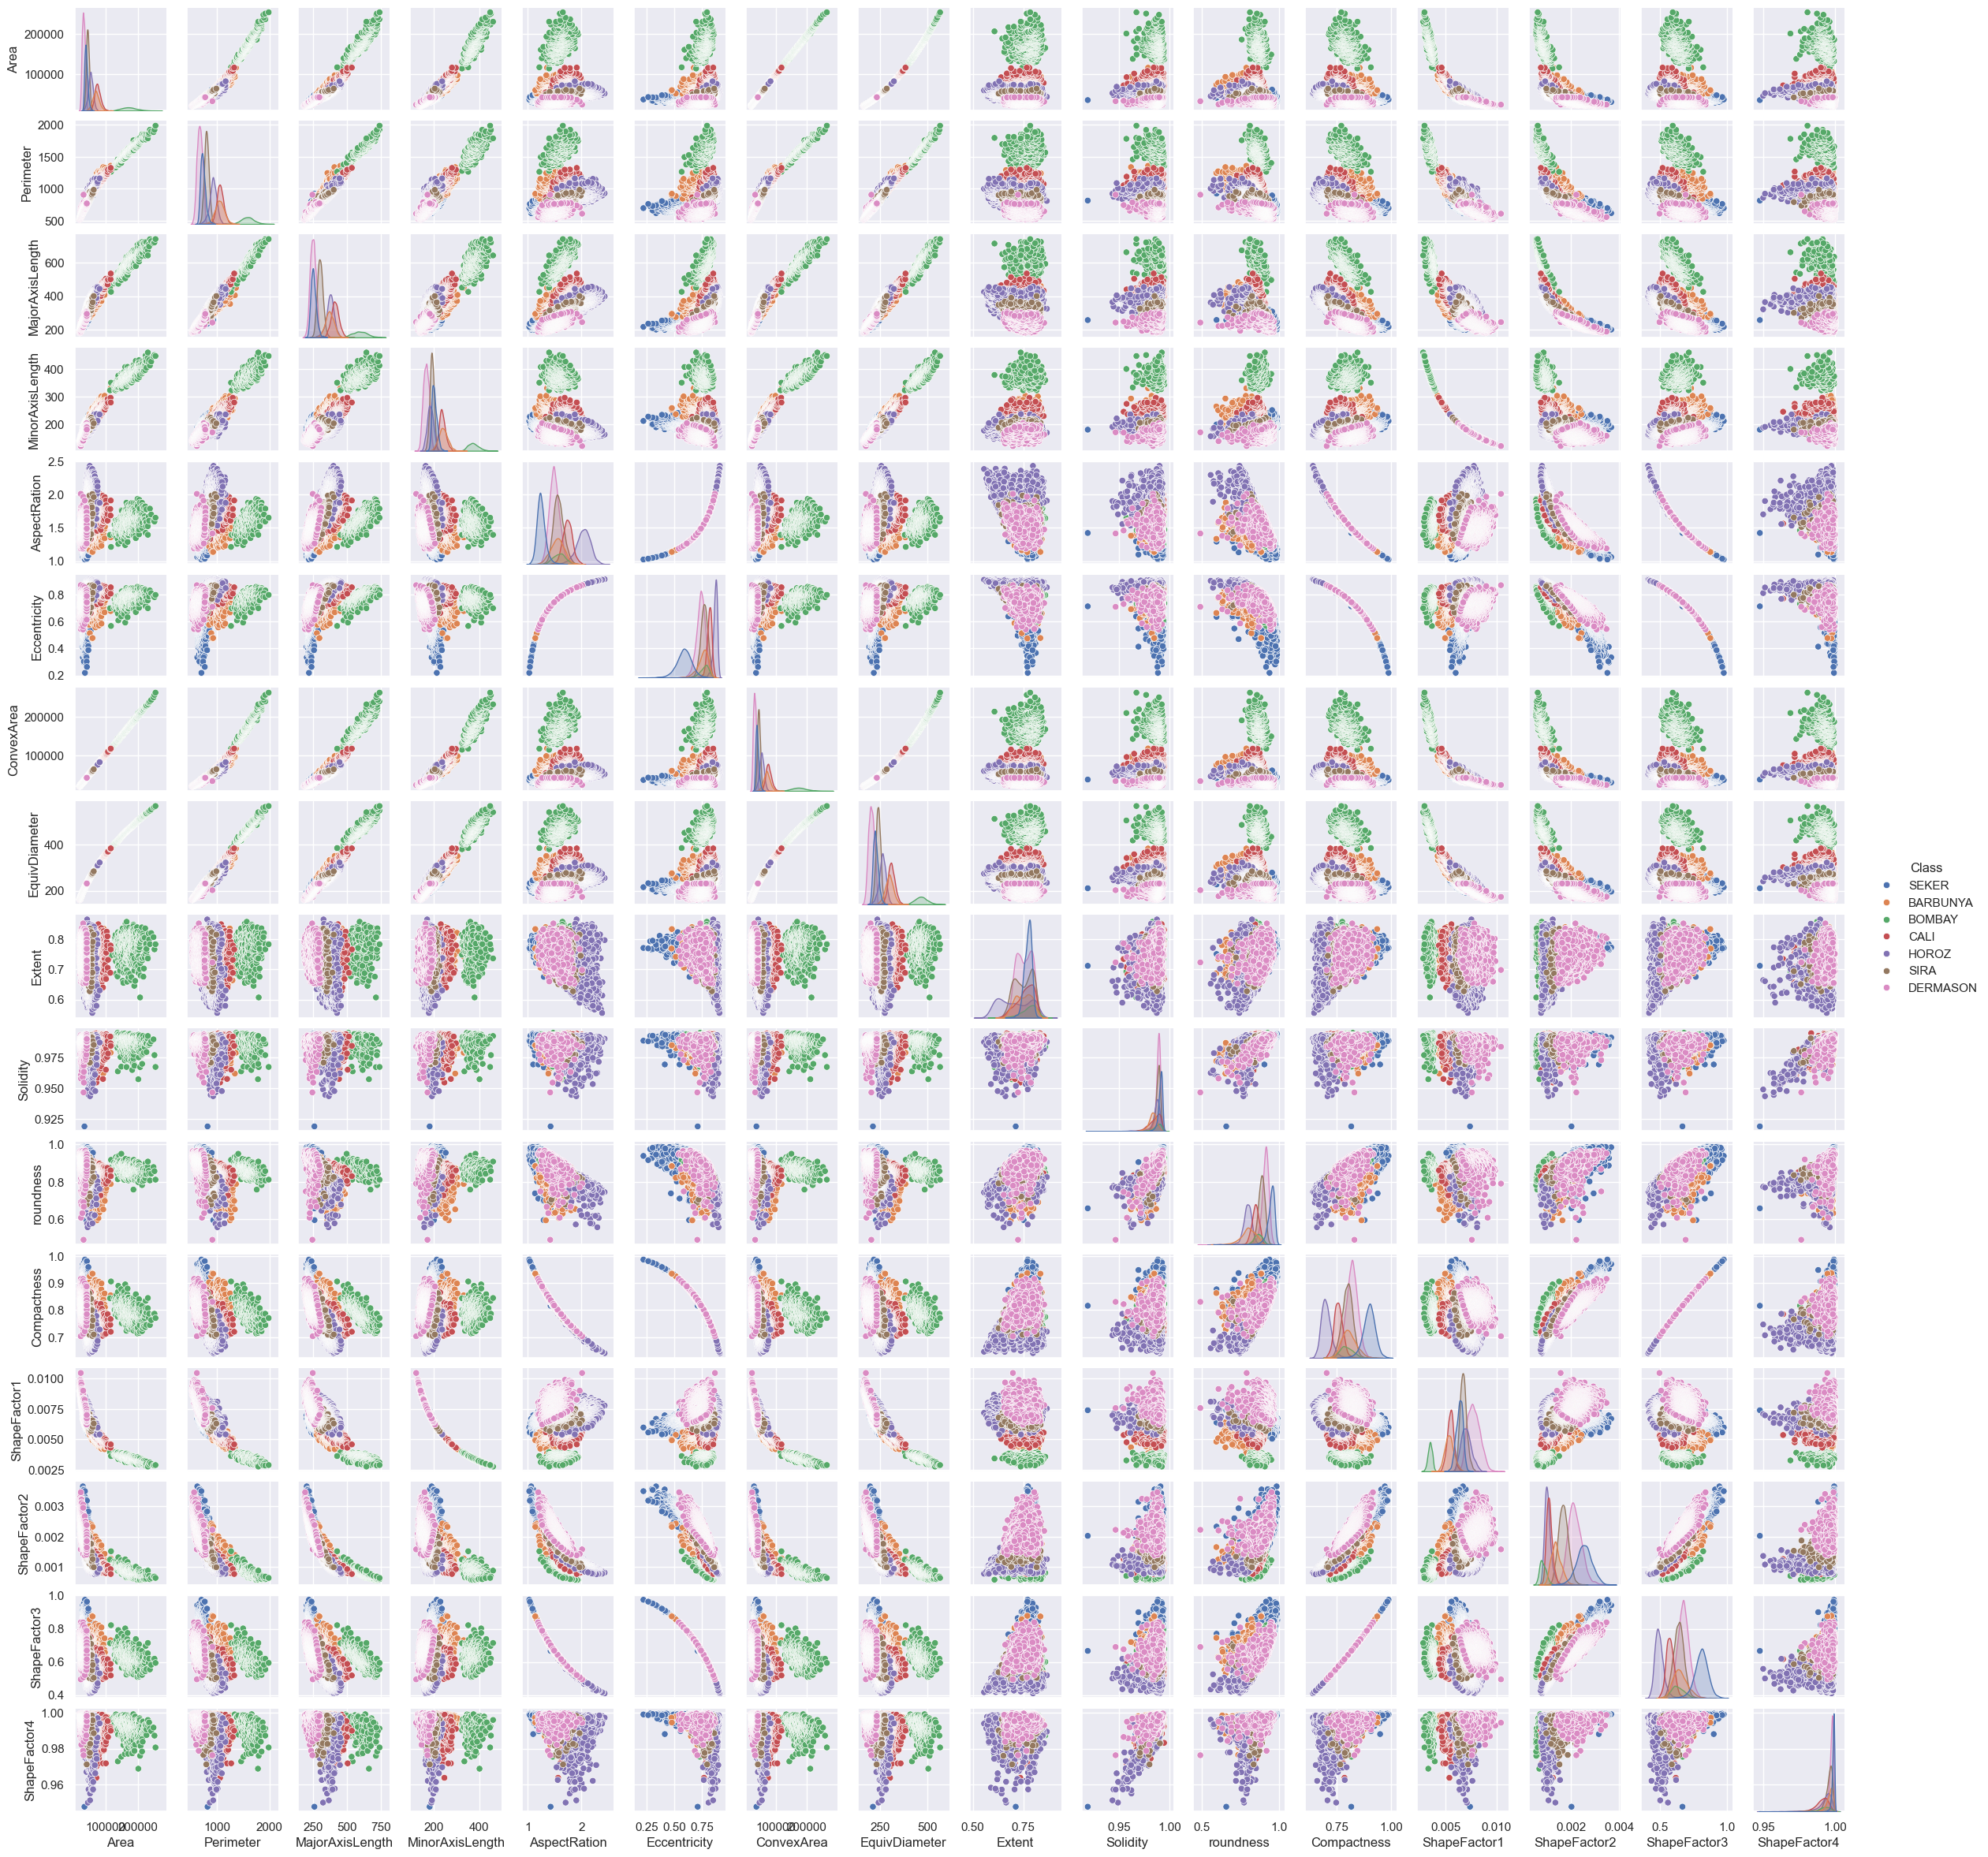

In [6]:
sns.set()
sns.pairplot(dryBean_df, hue='Class', height=1.5);

### Exploratory Data Analysis: Pairwise Feature Relationships

### Purpose
This visualization helps us understand:
- Distributions of individual features
- Relationships between feature pairs
- How different bean classes separate in feature space
